In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define fuzzy categories for loan_amount using triangular membership functions
fuzzy_categories = {
    "Low": (0, 5000, 10000),
    "Moderate": (5000, 10000, 20000),
    "High": (10000, 20000, 30000)
}


In [9]:
import pandas as pd

# Example data
loans_data = pd.DataFrame({
    'loan_amount': [2000, 7000, 12000, 18000, 25000]
})

# Fuzzy categories
fuzzy_categories = {
    'Low': (0, 5000, 10000),
    'Medium': (5000, 15000, 20000),
    'High': (15000, 25000, 30000)
}

# Triangular membership function
def triangular_membership(x, a, b, c):
    if x < a or x > c:
        return 0
    elif a <= x < b:
        return (x - a) / (b - a)
    elif b <= x <= c:
        return (c - x) / (c - b)

# Apply fuzzy logic
loans_data['Fuzzy_Memberships'] = loans_data['loan_amount'].apply(
    lambda amount: {category: triangular_membership(amount, *params)
                    for category, params in fuzzy_categories.items()}
)

# Display results
print(loans_data[['loan_amount', 'Fuzzy_Memberships']])


   loan_amount                       Fuzzy_Memberships
0         2000    {'Low': 0.4, 'Medium': 0, 'High': 0}
1         7000  {'Low': 0.6, 'Medium': 0.2, 'High': 0}
2        12000    {'Low': 0, 'Medium': 0.7, 'High': 0}
3        18000  {'Low': 0, 'Medium': 0.4, 'High': 0.3}
4        25000    {'Low': 0, 'Medium': 0, 'High': 1.0}


In [19]:
import os

output_dir = r"C:\Users\HP\Documents\MyData"
print(f"Trying to create directory: {output_dir}")

try:
    os.makedirs(output_dir, exist_ok=True)
    print("Directory created successfully.")
except PermissionError as e:
    print(f"PermissionError: {e}")


Trying to create directory: C:\Users\HP\Documents\MyData
PermissionError: [WinError 5] Access is denied: 'C:\\Users\\HP'


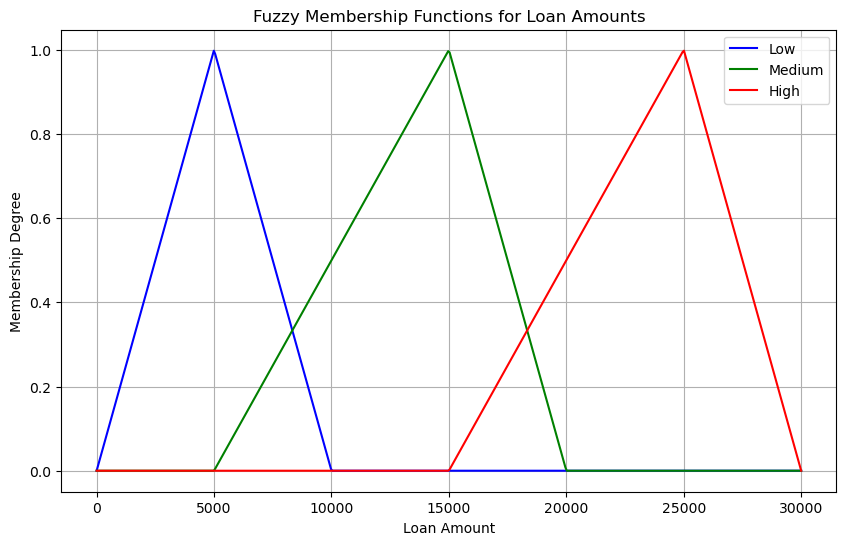

OSError: Cannot save file into a non-existent directory: 'C:\Users\HP\OneDrive\Documents\Arduino'

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values for visualization
x_vals = np.linspace(0, 30000, 500)

# Generate membership values
y_low = [triangular_membership(x, *fuzzy_categories["Low"]) for x in x_vals]
y_medium = [triangular_membership(x, *fuzzy_categories["Medium"]) for x in x_vals]
y_high = [triangular_membership(x, *fuzzy_categories["High"]) for x in x_vals]

# Plot membership functions
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_low, label="Low", color="blue")
plt.plot(x_vals, y_medium, label="Medium", color="green")
plt.plot(x_vals, y_high, label="High", color="red")
plt.title("Fuzzy Membership Functions for Loan Amounts")
plt.xlabel("Loan Amount")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid(True)
plt.show()

# Save the processed data with fuzzy memberships to a CSV file
output_path = r"C:\Users\HP\OneDrive\Documents\Arduino\loans_with_fuzzy_memberships.csv"
loans_data.to_csv(output_path, index=False)

print(f"Data saved to {output_path}")
